<a href="https://colab.research.google.com/github/sp-au-mu-nl/SpeechComm/blob/main/notebook/chap03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/sp-au-mu-nl/SpeechComm/raw/refs/heads/main/data/chap03.zip
!unzip chap03.zip
!rm chap03.zip

--2025-04-23 03:55:31--  https://github.com/sp-au-mu-nl/SpeechComm/raw/refs/heads/main/data/chap03.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sp-au-mu-nl/SpeechComm/refs/heads/main/data/chap03.zip [following]
--2025-04-23 03:55:31--  https://raw.githubusercontent.com/sp-au-mu-nl/SpeechComm/refs/heads/main/data/chap03.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 345802 (338K) [application/zip]
Saving to: ‘chap03.zip’

chap03.zip          100%[===================>] 337.70K  --.-KB/s    in 0.04s   

2025-04-23 03:55:32 (7.56 MB/s) - ‘chap03.zip’ saved [345802/345802]

Archive:  chap

プログラム 3.1

In [2]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import IPython.display
import numpy.fft
from scipy import signal

プログラム 3.2

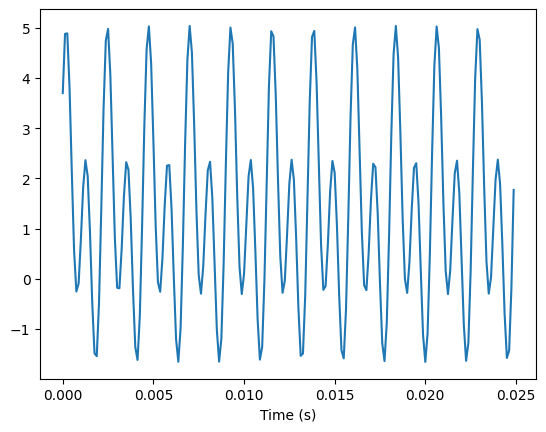

In [3]:
sr = 8000
t = np.arange(0,1,1/sr)
a0 = 1.4; a = np.array([[0.9], [1.4]]); b = np.array([[1.2], [1.8]])
f = 440
n = np.array([[1], [2]])
y = a0 + np.sum(a*np.cos(2*np.pi*f*n*t)+b*np.sin(2*np.pi*f*n*t),
                axis=0)

r=np.arange(0,200)
plt.plot(t[r],y[r])
plt.xlabel('Time (s)')

IPython.display.Audio(y,rate=sr)

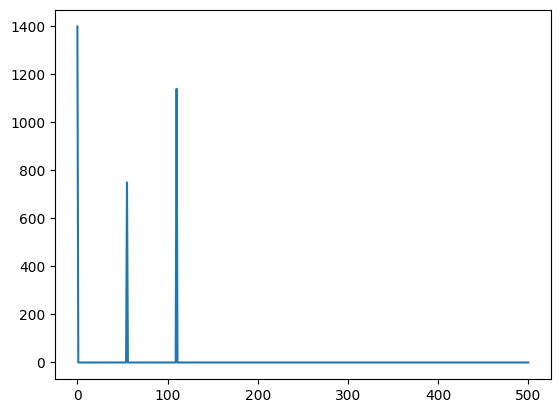

In [4]:
plt.close()
nFFT = 1000
S = np.fft.rfft(y,nFFT)
plt.plot(abs(S))

In [5]:
S[55]

np.complex128(450.0000000000042-599.9999999999973j)

In [6]:
S[110]

np.complex128(700.0000000000147-899.9999999999894j)

In [7]:
np.abs(S[55])

np.float64(750.0000000000003)

In [8]:
np.angle(S[55])

np.float64(-0.9272952180016055)

プログラム 3.3

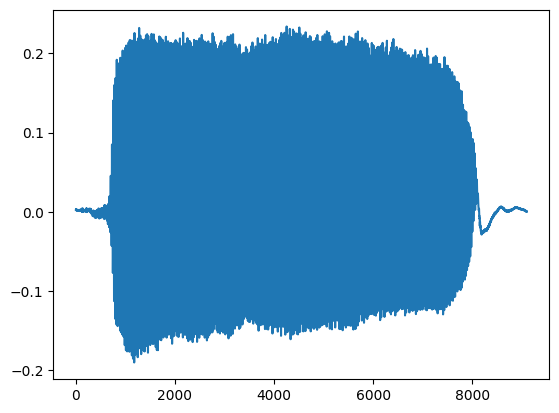

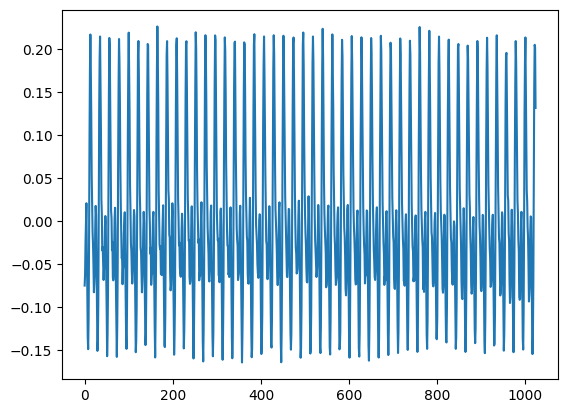

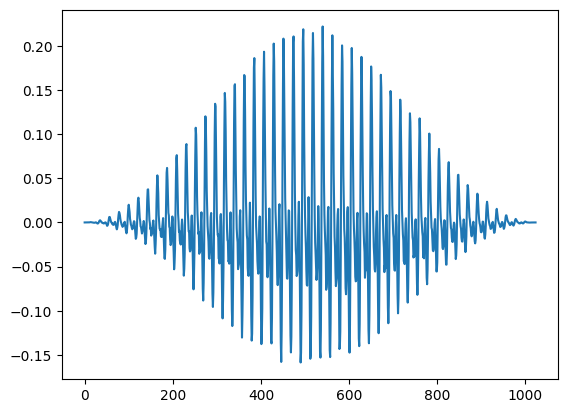

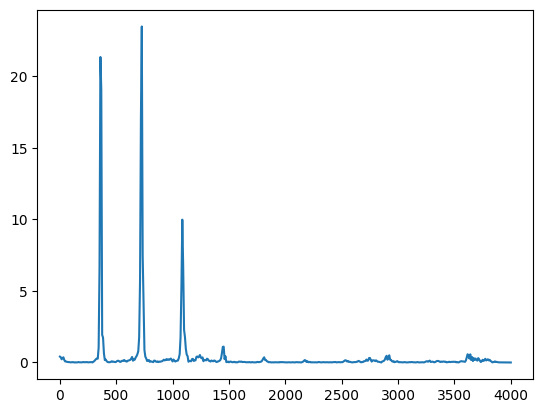

In [9]:
plt.close()
y, sr = librosa.load('a-falsetto.wav',sr=8000)
nFFT = 1024
plt.plot(y)
plt.figure(); plt.plot(y[2000+np.arange(nFFT)])
yWindow = y[2000+np.arange(nFFT)]*np.hanning(nFFT)
plt.figure(); plt.plot(yWindow)
S = np.fft.rfft(yWindow)
frequency = np.fft.rfftfreq(nFFT,1/sr)
plt.figure(); plt.plot(frequency,np.abs(S))

In [10]:
#peaks = signal.find_peaks(np.abs(S), distance=40, height=1)[0]
#peaks

In [11]:
#np.diff(peaks)

In [12]:
#S[46]

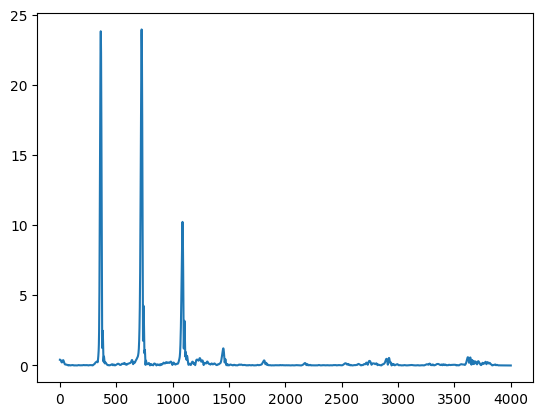

In [13]:
plt.close()
plt.close()
plt.close()
plt.close()
SZeroPadding = np.fft.rfft(yWindow,8192)
frequencyZeroPadding = np.fft.rfftfreq(8192,1/sr)
plt.plot(frequencyZeroPadding, np.abs(SZeroPadding))

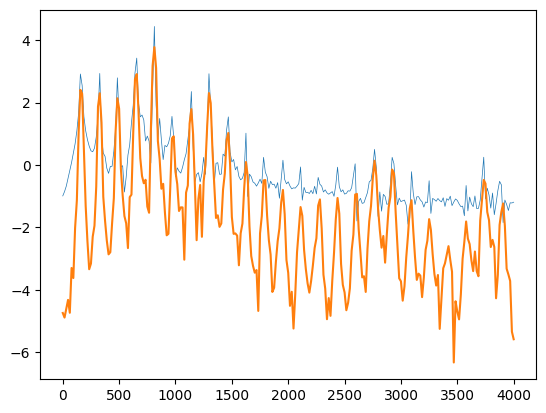

In [14]:
plt.close()
nFFT = 512
yA, sr = librosa.load('a8k.wav',sr=None)
yASegment = yA[2000+np.arange(nFFT)]
SARect = np.fft.rfft(yASegment*signal.windows.boxcar(nFFT))
frequency = np.fft.rfftfreq(nFFT,1/sr)
plt.plot(frequency, np.log(np.abs(SARect)), linewidth=0.5)
SAHann = np.fft.rfft(yASegment*np.hanning(nFFT))
plt.plot(frequency, np.log(np.abs(SAHann)))

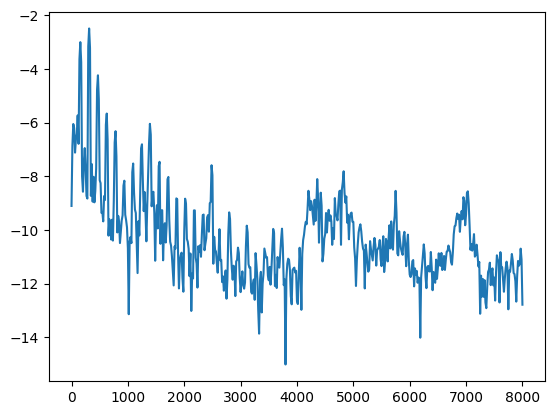

In [15]:
plt.close()
yAiueo, sr = librosa.load('aiueo16k.wav',sr=None)
nFFT = 1024; nOverlap = 512
f, t, S = signal.stft(yAiueo, fs=sr, nperseg=nFFT, noverlap=nOverlap)
plt.plot(f,np.log(np.abs(S[:,19])))

プログラム 3.4

Text(0, 0.5, 'Frequency (Hz)')

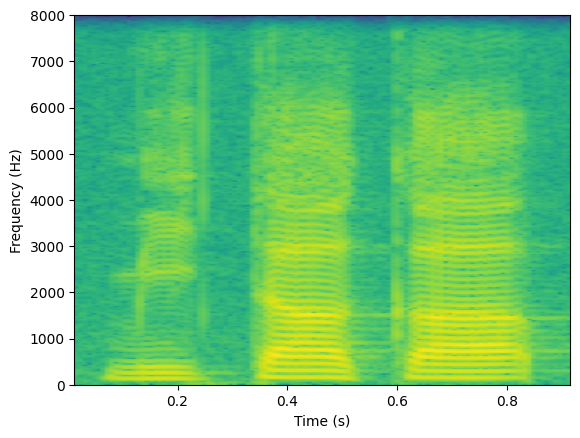

In [16]:
plt.close()
yMitaka16k, sr = librosa.load('mitaka48k.wav',sr=16000)
nFFT = 512; nShift = 128
plt.specgram(yMitaka16k,Fs=sr,NFFT=nFFT,window=np.hanning(nFFT),
             noverlap=nFFT-nShift)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

プログラム 3.5

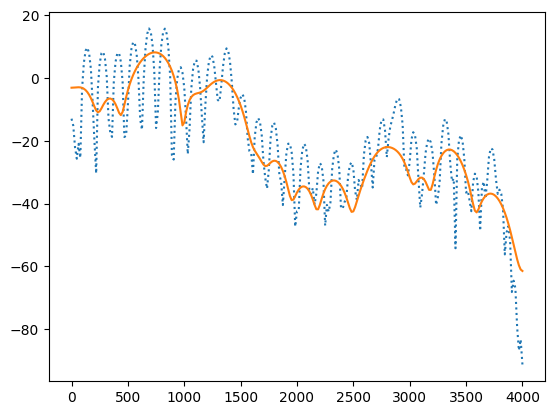

In [17]:
plt.close()
ySa, sr = librosa.load('sa48k.wav',sr=8000)
nFFT = 512; nNarrow = 256; nWide = 64
SNarrow = np.fft.rfft(ySa[3200+np.arange(nNarrow)]*np.hanning(nNarrow),
                      nFFT)
frequency = np.fft.rfftfreq(nFFT,1/sr)
plt.plot(frequency, 20*np.log10(np.abs(SNarrow)), ':')
SWide = np.fft.rfft(ySa[3200+np.arange(nWide)]*np.hanning(nWide),nFFT)
plt.plot(frequency, 20*np.log10(np.abs(SWide)))

プログラム 3.6

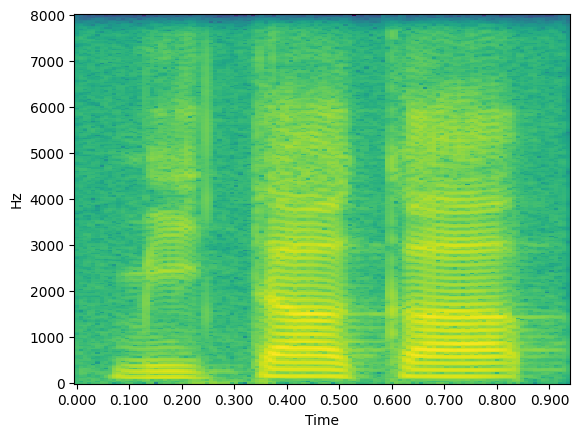

In [18]:
plt.close()
yMitaka16k, sr = librosa.load('mitaka48k.wav',sr=16000)
nFFT = 512; nShift = 128
f, t, SMitaka = signal.stft(yMitaka16k, fs=sr, nperseg=nFFT,
                            noverlap=nFFT-nShift)
librosa.display.specshow(20*np.log10(np.abs(SMitaka)), cmap='viridis',
                         x_coords=t, x_axis='time',
                         y_coords=f, y_axis='linear')